In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,10)



Bad key "text.kerning_factor" on line 4 in
C:\Users\MAC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_df=pd.read_csv("C:\\Users\\MAC\\Downloads\\datasets_20710_26737_Bengaluru_House_Data.csv")
train_df.head(50)
#by looking at the data we can see that alpha categories are area_type, location society, and availability has aplha and date, size is alphanumeric, and total_sqft and price are continus numeric,categorical feature are area_type,location,size, bath,balconcy,society.
#clearly we can see society, balcony has null values and society has lots of null values.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
train_df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [4]:
print(train_df.columns.values)

['area_type' 'availability' 'location' 'size' 'society' 'total_sqft'
 'bath' 'balcony' 'price']


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
train_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
train_df.describe(include=['O'])

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [8]:
train_df.shape

(13320, 9)

In [9]:
train_df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
train_df.groupby('size').agg('count')

,area_type,availability,location,society,total_sqft,bath,balcony,price
size,,,,,,,,
1 BHK,538,538,538,361,538,531,530,538
1 Bedroom,105,105,105,0,105,105,105,105
1 RK,13,13,13,10,13,13,13,13
10 BHK,2,2,2,0,2,2,0,2
10 Bedroom,12,12,12,1,12,12,3,12
11 BHK,2,2,2,1,2,2,1,2
11 Bedroom,2,2,2,0,2,2,2,2
12 Bedroom,1,1,1,0,1,1,1,1
13 BHK,1,1,1,0,1,1,1,1


In [11]:
#droping feature that has least dependency on our targeted value(price)
train_df=train_df.drop(['area_type','society','balcony','availability'],axis=1)
train_df


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
train_df.shape

(13320, 5)

In [13]:
#lets check the number of na values in data set
train_df.isnull().sum()
#this will let us know how many na values are present in a particular feature 


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
#so now we gonna drop all na values because we have large number of data so dropping these small amount of na values will not affect the result much. by the we can fill these values with median or mode 
#train_df.loc[train_df['bath'].dropna(),'bath']=train_df['bath'].dropna().mode()

In [15]:
train_df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
train_df=train_df.dropna()
train_df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [17]:
train_df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [18]:
train_df.shape

(13246, 5)

In [19]:
train_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [20]:
train_df['bhk']=train_df['size'].apply(lambda x:int(x.split(' ')[0]))
train_df.head()

C:\Users\MAC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
train_df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
train_df[train_df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [23]:
train_df['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return  False
    return True
train_df[~train_df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [25]:
#here in total_sqft feature we have some the value in range form and some are having different units (error) we will have correct that
#for range value we will take range so for that we will define a function
def convert_sqft_into_num(x):
    parts=x.split('-')
    if parts==2:
        avg=(parts[0]+parts[1])/2
    try:
        return float(x)
    except:
        return None
train_df['total_sqft']=train_df['total_sqft'].apply(convert_sqft_into_num)
train_df['total_sqft'].head(50)


C:\Users\MAC\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0     1056.00
1     2600.00
2     1440.00
3     1521.00
4     1200.00
5     1170.00
6     2732.00
7     3300.00
8     1310.00
9     1020.00
10    1800.00
11    2785.00
12    1000.00
13    1100.00
14    2250.00
15    1175.00
16    1180.00
17    1540.00
18    2770.00
19    1100.00
20     600.00
21    1755.00
22    2800.00
23    1767.00
24     510.00
25    1250.00
26     660.00
27    1610.00
28    1151.00
29    1025.00
30        NaN
31    1075.00
32    1760.00
33    1693.00
34    1925.00
35     700.00
36    1070.00
37    1724.00
38    1290.00
39    1143.00
40    1296.00
41    1254.00
42     600.00
43     660.00
44    1330.74
45     600.00
46     970.00
47    1459.00
48     800.00
49     869.00
Name: total_sqft, dtype: float64

In [26]:
train_df['total_sqft'].isnull().sum()

190

In [27]:
#feature engineering analysis defineing some feature and deleting unrequired ones
#according to our basic knowledge we can say that price is directly affected by total_sqft so we will define one feature Price_per_sqft
train_df['price_per_sqft']=train_df['price']*100000/train_df['total_sqft']
train_df.head()

C:\Users\MAC\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
#bhk feature
train_df[['bhk','price']].groupby('bhk',axis=0,as_index=False).mean().sort_values('price',ascending=False)

,bhk,price
18,43,660.000000
14,16,550.000000
9,10,530.000000
16,19,490.000000
11,12,300.000000
4,5,280.325779
12,13,275.000000
3,4,271.396986
6,7,244.370000
8,9,241.944444


In [29]:
#the second feature we will be looking at is location and its a categorical feature
train_df.describe(include='O')
train_df.location.apply(lambda x:x.strip())
location_stat=train_df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat.head(50)
len(location_stat[location_stat<=10])

1063

In [30]:
location_10=location_stat[location_stat<=10]
location_10.head(50)

location
Ganga Nagar                  10
Nagappa Reddy Layout         10
BTM 1st Stage                10
Dodsworth Layout             10
Kalkere                      10
Nagadevanahalli              10
Sadashiva Nagar              10
Naganathapura                10
Basapura                     10
1st Block Koramangala        10
Dairy Circle                 10
Gunjur Palya                 10
Mathikere                     9
2nd Phase JP Nagar            9
Gollahalli                    9
Yemlur                        9
Ejipura                       9
Volagerekallahalli            9
Vishwanatha Nagenahalli       9
KUDLU MAIN ROAD               9
Chennammana Kere              9
Lingarajapuram                9
B Narayanapura                9
Kaverappa Layout              9
Jakkur Plantation             9
Vignana Nagar                 9
Medahalli                     9
Richmond Town                 9
Kamakshipalya                 9
Chandra Layout                9
Peenya                        9

In [31]:
train_df.head()
train_df['feature_location']=train_df['location'].apply(lambda x: 'other' if x in location_10 else x)
len(train_df['feature_location'].unique())

C:\Users\MAC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


242

In [32]:
#removing the ourliers we can say errors or disturbaning data points
#so for removing we require domain knowlege
train_df[train_df.total_sqft/train_df.bhk<300].head()
train_df.drop('location',axis=1,inplace=True)
train_df.feature_location.head(50)


C:\Users\MAC\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


0     Electronic City Phase II
1             Chikka Tirupathi
2                  Uttarahalli
3           Lingadheeranahalli
4                     Kothanur
5                   Whitefield
6             Old Airport Road
7                 Rajaji Nagar
8                 Marathahalli
9                        other
10                  Whitefield
11                  Whitefield
12          7th Phase JP Nagar
13                   Gottigere
14                    Sarjapur
15                 Mysore Road
16               Bisuvanahalli
17       Raja Rajeshwari Nagar
18                       other
19                       other
20                     Kengeri
21                  Binny Pete
22                 Thanisandra
23                   Bellandur
24                       other
25                       other
26             Electronic City
27                  Whitefield
28            Ramagondanahalli
29             Electronic City
30                   Yelahanka
31               Bisuvanahalli
32      

In [33]:
train_df.shape


(13246, 7)

In [34]:
train_df=train_df[~(train_df.total_sqft/train_df.bhk<300)]
train_df.shape


(12502, 7)

In [35]:
train_df.price_per_sqft.describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
#removing outliers
def remove_pps_outliers(X):
    dfnew=pd.DataFrame()
    for key,subdf in X.groupby('feature_location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_X=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        dfnew=pd.concat([dfnew,reduced_X],ignore_index=True)
    return dfnew
train_df=remove_pps_outliers(train_df)
train_df

,size,total_sqft,bath,price,bhk,price_per_sqft,feature_location
0,3 BHK,1250.0,2.0,44.00,3,3520.000000,Devarachikkanahalli
1,2 BHK,1250.0,2.0,40.00,2,3200.000000,Devarachikkanahalli
2,2 Bedroom,1200.0,2.0,83.00,2,6916.666667,Devarachikkanahalli
3,2 BHK,1170.0,2.0,40.00,2,3418.803419,Devarachikkanahalli
4,3 BHK,1425.0,2.0,65.00,3,4561.403509,Devarachikkanahalli
...,...,...,...,...,...,...,...
10138,2 BHK,1353.0,2.0,110.00,2,8130.081301,other
10139,1 Bedroom,812.0,1.0,26.00,1,3201.970443,other
10140,3 BHK,1440.0,2.0,63.93,3,4439.583333,other
10141,2 BHK,1075.0,2.0,48.00,2,4465.116279,other


In [37]:
train_df.shape

(10143, 7)

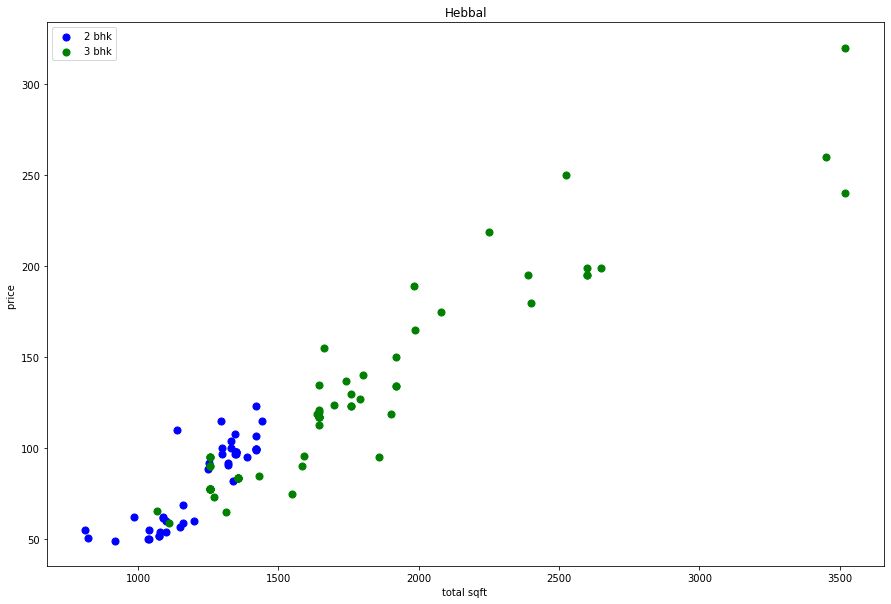

In [38]:
def scatter_plot(df,location):
    bhk2=df[(df.feature_location==location)&(df.bhk==2)]
    bhk3=df[(df.feature_location==location)&(df.bhk==3)]
    mpl.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 bhk', s=50)
    plt.xlabel('total sqft ')
    plt.ylabel('price ')
    plt.title(location)
    plt.legend()
scatter_plot(train_df,'Hebbal')    
    
    

In [39]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('feature_location'):
        bhk_stat={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stat.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')  
train_df=remove_bhk_outliers(train_df)
train_df.shape

(7227, 7)

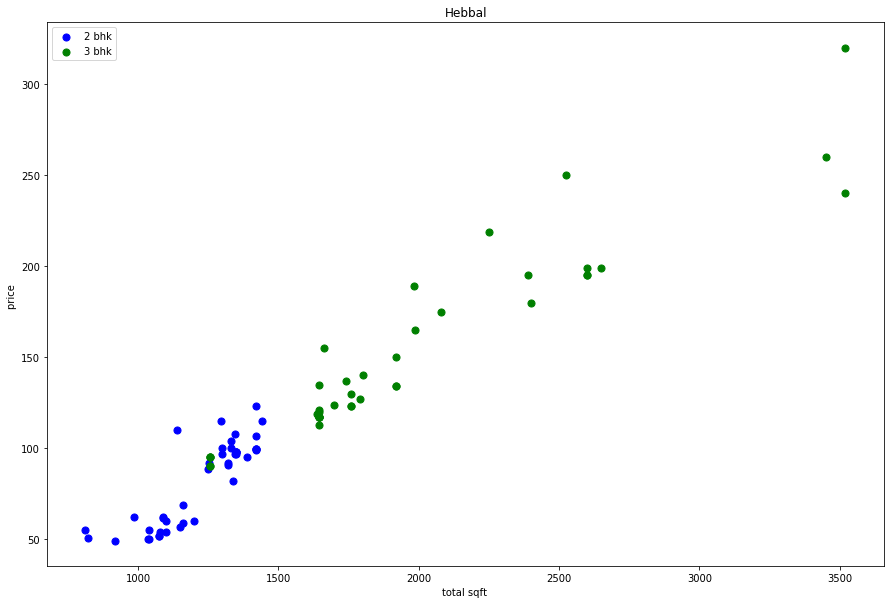

In [40]:
scatter_plot(train_df,'Hebbal')

Text(0, 0.5, 'count')

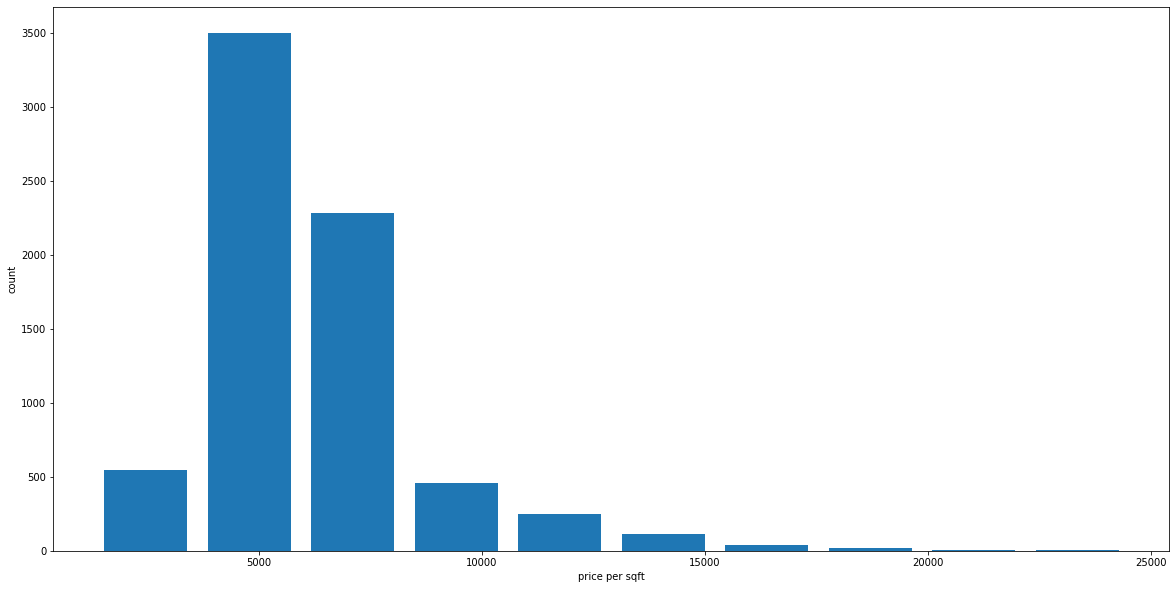

In [41]:
mpl.rcParams['figure.figsize']=(20,10)
plt.hist(train_df.price_per_sqft,rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')


In [42]:
train_df.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
train_df[train_df.bath>10]

,size,total_sqft,bath,price,bhk,price_per_sqft,feature_location
5215,10 BHK,4000.0,12.0,160.0,10,4000.000000,Neeladri Nagar
8385,10 BHK,12000.0,12.0,525.0,10,4375.000000,other
8474,16 BHK,10000.0,16.0,550.0,16,5500.000000,other
9211,11 BHK,6000.0,12.0,150.0,11,2500.000000,other
9541,13 BHK,5425.0,13.0,275.0,13,5069.124424,other


Text(0, 0.5, 'count')

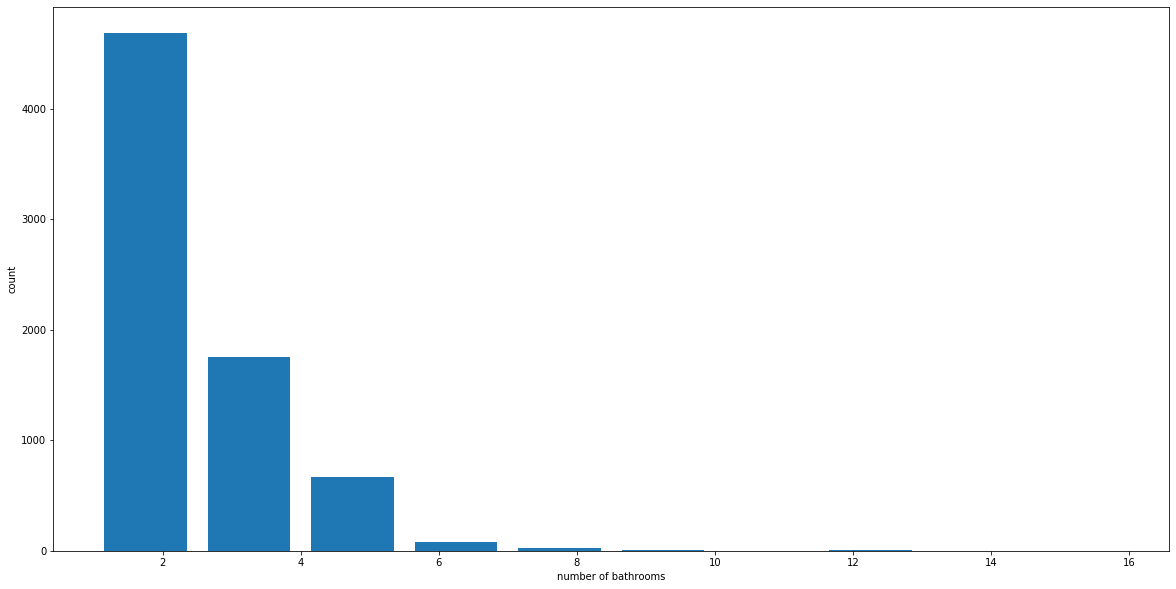

In [44]:
plt.hist(train_df.bath,rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')


In [45]:
train_df[train_df.bath>train_df.bhk+2]

,size,total_sqft,bath,price,bhk,price_per_sqft,feature_location
1622,4 Bedroom,2460.0,7.0,80.0,4,3252.032520,Chikkabanavar
5176,4 Bedroom,7000.0,8.0,450.0,4,6428.571429,Nagasandra
6632,3 BHK,1806.0,6.0,116.0,3,6423.034330,Thanisandra
8309,6 BHK,11338.0,9.0,1000.0,6,8819.897689,other


In [46]:
train_df=train_df[train_df.bath<train_df.bhk+2]
train_df.shape

(7154, 7)

In [47]:
train_df=train_df.drop(['size','price_per_sqft'],axis=1)
train_df

,total_sqft,bath,price,bhk,feature_location
1,1250.0,2.0,40.0,2,Devarachikkanahalli
2,1200.0,2.0,83.0,2,Devarachikkanahalli
3,1170.0,2.0,40.0,2,Devarachikkanahalli
4,1425.0,2.0,65.0,3,Devarachikkanahalli
5,947.0,2.0,43.0,2,Devarachikkanahalli
...,...,...,...,...,...
10134,1200.0,2.0,70.0,2,other
10135,1800.0,1.0,200.0,1,other
10138,1353.0,2.0,110.0,2,other
10139,812.0,1.0,26.0,1,other


In [48]:
#model building 
#before model building we need to convert all the  feature in numeric values
#one hot encoding
train_dummies=pd.get_dummies(train_df.feature_location)
train_dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
train_df=pd.concat([train_df,train_dummies], axis=1)

In [50]:
train_df

,total_sqft,bath,price,bhk,feature_location,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,40.0,2,Devarachikkanahalli,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,Devarachikkanahalli,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,Devarachikkanahalli,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,Devarachikkanahalli,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,Devarachikkanahalli,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,1200.0,2.0,70.0,2,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10135,1800.0,1.0,200.0,1,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10138,1353.0,2.0,110.0,2,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10139,812.0,1.0,26.0,1,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
train_df=train_df.drop(['feature_location','other'],axis=1)
train_df

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10135,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10138,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10139,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train_df.shape
X=train_df.drop('price',axis=1)
X.shape


(7154, 244)

In [53]:
Y=train_df.price
Y.shape

(7154,)

In [54]:
#now for training and testing the data we split the data into two parts
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
performance=lr.score(X_train,Y_train)
performance



0.8614720568568466

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X_train,Y_train,cv=cv)

array([0.8564306 , 0.84069126, 0.79501049, 0.83450282, 0.79316642])

In [57]:
#now we try some other models like lasso and decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
                
            }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
                
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
                
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X_train,Y_train)
    
    
    
    
    

,model,best_score,best_params
0,linear_regression,0.823960,{'normalize': False}
1,Lasso,0.683971,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.732692,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [58]:
X_train.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [59]:
#in the previous analysis we found linearRegression best model
#now we are going create function to predict the price
def predict_price(loc,sqft,bath,bhk):
    loc_index=np.where(X_train.columns==loc)[0][0]
    x=np.zeros(len(X_train.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
        
    return lr.predict([x])[0]
predict_price('Indira Nagar',1000,3,3)

183.8616171590861

In [64]:
#export the model using pickle file
import pickle
with open('banglore_home_prices_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [61]:
import json
columns={
    'data_columns':[col.lower() for col in X_train.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))